# Load Preprocessed Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('cleaned-data-kbk.csv')
df.head()

,Unnamed: 0,id,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,0,1,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus tentu dosen bimbin...,sistem dukung putus spk sistem milik kemampuan...
1,1,3,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi kesiap kerja lulus smk negeri k...,pandemi covid 19 landa dunia indonesia 2020 da...
2,2,4,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek re...,tuju laku teliti bantu sandang tuetra gerak ma...
3,3,6,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru sub transmisi listrik kota si...
4,4,7,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis mata ajar wajib ...


# Split Data

In [2]:
from sklearn.model_selection import train_test_split

X = df['judul_tokens'] + ' ' + df['abstrak_tokens']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print('Train size: ', X_train_tfidf.shape)
print('Test size: ', X_test_tfidf.shape)

Train size:  (884, 8977)
Test size:  (380, 8977)


In [4]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

          term        rank
581       ajar  112.012365
7542     siswa   54.385980
3952   kembang   35.739068
8094    teliti   34.865839
4911     media   34.248031
...        ...         ...
290       4e57    0.010391
1425  c1bb9096    0.010391
1430      c825    0.010391
52        1283    0.010391
567       agus    0.010391

[8977 rows x 2 columns]



# Oversampling: SMOTE

In [5]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [6]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Strategi Pembelajaran Teknologi dan Kejuruan                                     194
Game Technology and Machine Learning Applications                                194
Telematics loT System and Devices                                                194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Ketenegakerjaan Teknologi dan Kejuruan                                           194
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control a

# Training Model

## GridSearchCV

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.1, kernel=rbf, score=0.743, total=   8.5s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.735, total=   8.2s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.7s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.798, total=   8.4s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.806, total=   8.2s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.861, total=   8.1s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.857, total=   8.2s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.837, total=   8.1s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.881, total=   8.2s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.841, total=   8.2s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  9.6min finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [8]:
# Tabel hasil GridSearchCV
grid_results = pd.DataFrame(grid.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,7.635626,0.170868,0.584089,0.047041,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.743083,0.735178,0.797619,0.805556,0.861111,0.857143,0.837302,0.880952,0.841270,0.865079,0.822429,0.048302,11
1,8.357135,0.123724,0.551268,0.045919,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.782609,0.782609,0.845238,0.853175,0.865079,0.861111,0.841270,0.853175,0.789683,0.869048,0.834300,0.033300,10
2,6.104113,0.064966,0.534390,0.046280,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.762846,0.707510,0.789683,0.777778,0.833333,0.861111,0.865079,0.845238,0.837302,0.845238,0.812512,0.048513,12
3,3.273440,0.066405,0.338525,0.032172,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.916996,0.893281,0.948413,0.952381,0.988095,0.976190,0.980159,0.976190,0.996032,0.996032,0.962377,0.032792,3
4,5.485895,0.072940,0.332632,0.031806,1,poly,"{'C': 1, 'kernel': 'poly'}",0.893281,0.877470,0.952381,0.936508,0.968254,0.956349,0.972222,0.956349,0.980159,0.996032,0.948900,0.035482,5
5,2.253872,0.045949,0.291121,0.030460,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.877470,0.865613,0.900794,0.920635,0.940476,0.952381,0.956349,0.956349,0.980159,0.988095,0.933832,0.039483,9
6,3.174860,0.079601,0.310440,0.027939,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.924901,0.905138,0.956349,0.960317,0.988095,0.976190,0.984127,0.980159,0.992063,1.000000,0.966734,0.029103,1
7,5.103522,0.059671,0.278553,0.019579,10,poly,"{'C': 10, 'kernel': 'poly'}",0.905138,0.885375,0.956349,0.936508,0.964286,0.952381,0.964286,0.952381,0.976190,0.996032,0.948893,0.031022,6
8,1.816226,0.055480,0.165812,0.006290,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.936759,0.913043,0.932540,0.932540,0.956349,0.960317,0.960317,0.964286,0.976190,0.996032,0.952837,0.023092,4
9,3.180980,0.087123,0.311143,0.021299,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.924901,0.905138,0.956349,0.960317,0.988095,0.976190,0.984127,0.980159,0.992063,1.000000,0.966734,0.029103,1


In [9]:
# Peringkat Score Parameter hasil GridSearchCV
grid_results[['rank_test_score', 'params', 'mean_test_score']].sort_values(by=['rank_test_score'])

,rank_test_score,params,mean_test_score
6,1,"{'C': 10, 'kernel': 'rbf'}",0.966734
9,1,"{'C': 100, 'kernel': 'rbf'}",0.966734
3,3,"{'C': 1, 'kernel': 'rbf'}",0.962377
8,4,"{'C': 10, 'kernel': 'sigmoid'}",0.952837
4,5,"{'C': 1, 'kernel': 'poly'}",0.948900
7,6,"{'C': 10, 'kernel': 'poly'}",0.948893
10,6,"{'C': 100, 'kernel': 'poly'}",0.948893
11,8,"{'C': 100, 'kernel': 'sigmoid'}",0.942940
5,9,"{'C': 1, 'kernel': 'sigmoid'}",0.933832
1,10,"{'C': 0.1, 'kernel': 'poly'}",0.834300


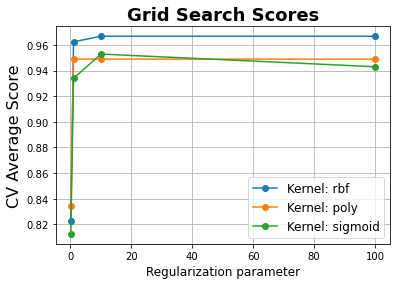

In [10]:
import matplotlib.pyplot as plt

# Plotting hasil GridSearchCV
rbf_score = grid_results['mean_test_score'].loc[grid_results['param_kernel'] == 'rbf'].to_numpy()
poly_score = grid_results['mean_test_score'].loc[grid_results['param_kernel'] == 'poly'].to_numpy()
sigmoid_score = grid_results['mean_test_score'].loc[grid_results['param_kernel'] == 'sigmoid'].to_numpy()

scores_mean = np.concatenate((rbf_score, poly_score, sigmoid_score))

def plot_grid_search(scores_mean, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label=name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=12)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=12)
    ax.grid('on')

# Calling Method 
plot_grid_search(scores_mean, param_grid['C'], param_grid['kernel'], 'Regularization parameter', 'Kernel')

In [24]:
from sklearn.svm import SVC

clf = SVC(C=0.1, kernel='sigmoid')
model = clf.fit(X_train_resampled,y_train_resampled)

# Evaluation

In [25]:
predictions = model.predict(X_test_tfidf)

In [26]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 3  0  1  1  0  0  0  0  1  2  0  0  5]
 [ 0  8  0  0  1  1  2  1  0  0  2  0  0]
 [ 0  0 20  0  0  0  0  1  6  0  0  0  0]
 [ 2  0  1 10  8  0  0  0  0  1  0  0  2]
 [ 0  0  0  6 16  0  0  0  0  0  0  0  0]
 [ 0  4  0  2  1 19  5  0  0  0  0  0  0]
 [ 0  2  0  0  0  7  3  3  0  0  8  0  0]
 [ 0  0  2  1  1  0  0 75  0  0  7  1  1]
 [ 1  1  4  0  1  0  0  0 25  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  0  4  0  0  2]
 [ 0  0  1  0  0  0  0 21  1  0 39  0  0]
 [ 0  0  4  0  0  0  0  0  1  0  0 15  1]
 [ 1  0  1  1  1  0  0  0  0  1  0  0  9]]


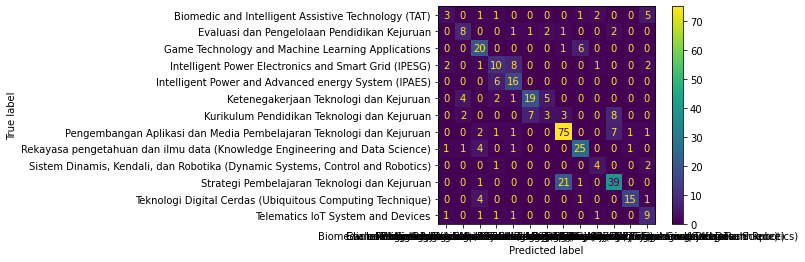

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test) 
plt.show()

In [28]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.43      0.23      0.30        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.53      0.53      0.53        15
                            Game Technology and Machine Learning Applications       0.59      0.74      0.66        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.45      0.42      0.43        24
                         Intelligent Power and Advanced energy System (IPAES)       0.55      0.73      0.63        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.70      0.61      0.66        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.30      0.13      0.18        23
          Pengembangan Aplikasi dan Media Pembe

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.6473684210526316
Precision score :  0.6377232684212871
Recall score :  0.6473684210526316
F1 score :  0.6355553078618956


# Export Model

In [30]:
from joblib import dump

dump(model, filename="svm-model-judul-abstrak.joblib")

['svm-model-judul-abstrak.joblib']